# Posse Data: Predicting Mood & Energy!

In [24]:
# Import libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sbn 

In [25]:
# Import data set
data = pd.read_csv('health.csv')

# Clean and get dummies for days 
dum = pd.get_dummies(data['day'])
data = pd.concat([data, dum], axis=1)

###  Step 1:
*Let's first look at some visualizations to help better understand mood and energy based on our control variables:*

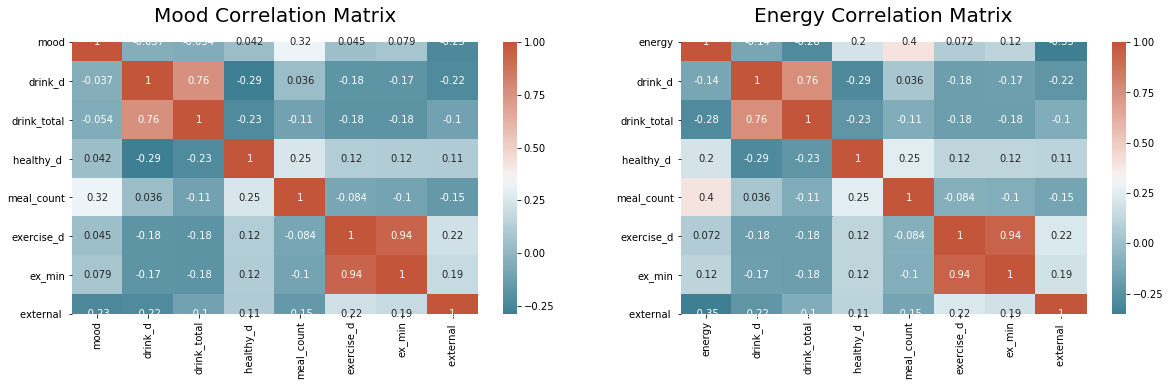

In [65]:
# Heatmap - this helps us identify how strongly variables are correlated with mood and energy! 
# Note: says nothing about causation!! 

corr_mood = data[['mood','drink_d','drink_total','healthy_d ','meal_count','exercise_d','ex_min','external ']].corr()
corr_energy = data[['energy','drink_d','drink_total','healthy_d ','meal_count','exercise_d','ex_min','external ']].corr()

fig, ax = plt.subplots(1,2,figsize=(20,5))
sbn.heatmap(corr_mood, annot=True, cmap=sbn.diverging_palette(220, 20, as_cmap=True), ax = ax[0])
sbn.heatmap(corr_energy, annot=True, cmap=sbn.diverging_palette(220, 20, as_cmap=True), ax = ax[1])
ax[0].set_title('Mood Correlation Matrix', size=20, pad=20)
ax[1].set_title('Energy Correlation Matrix', size = 20, pad = 20)
plt.subplots_adjust(wspace=.2)
plt.show()

#### Key Takeaways from correlation matrices: 
1) Eating healthy meals and more meals is positively correlated with energy levels and  mood!

2) Second to a balanced diet, external factors are most strongly correlated with mood and energy. 

3) Drinking has a small negative correlation with mood, but a pretty substantial negative correlation with energy.

**Are days of the week correlated with mood and energy?**

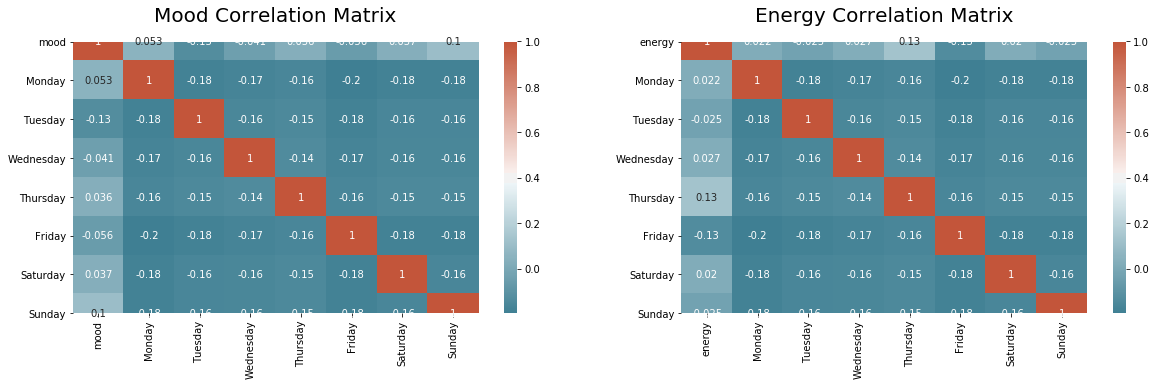

In [66]:
# Heatmap - this helps us identify how strongly variables are correlated with mood and energy! 
# Note: says nothing about causation!! 

corr_mood = data[['mood','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']].corr()
corr_energy = data[['energy','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']].corr()

fig, ax = plt.subplots(1,2,figsize=(20,5))
sbn.heatmap(corr_mood, annot=True, cmap=sbn.diverging_palette(220, 20, as_cmap=True), ax = ax[0])
sbn.heatmap(corr_energy, annot=True, cmap=sbn.diverging_palette(220, 20, as_cmap=True), ax = ax[1])
ax[0].set_title('Mood Correlation Matrix', size=20, pad=20)
ax[1].set_title('Energy Correlation Matrix', size = 20, pad = 20)
plt.subplots_adjust(wspace=.2)
plt.show()

#### Key Takeaways:
1) Make sure you are eating well on Monday, Tuesday!! That should help mitigate the drop in mood and energy that occurs Wednesday through Friday.

2) Sunday scaries? Doesn't look like it for this group. Beginning and ends of weeks are positively correlated with mood, while the middle of weeks is negatively correlated. 

### Step 2: 
*Now that we have a better understanding of the data, let's try to run some simple predictive tasks*

In [119]:
# Convert dataframe into matrix
datam = pd.DataFrame.to_numpy(data)

# Generate matrices used for estimation 
y_energy = datam[:,12]
y_mood = datam[:,11]
x = datam[:,[3,4,5,6,7,8,9,10,13,15,16,17,18,19,20,21]]
x = x.astype(np.float)
y_energy = y_energy.astype(np.float)
y_mood = y_mood.astype(np.float)

In [120]:
# Find coefficient vector 
## w = (Xt * X)^(-1)*Xt*y
w_energy = np.linalg.inv(x.transpose()@x)@x.transpose()@y_energy
w_mood = np.linalg.inv(x.transpose()@x)@x.transpose()@y_mood

In [122]:
# Print out mood coefficients
w_mood

array([ 0.27867192, -0.83576235,  0.11638708, -0.01688057,  1.26873345,
       -1.4610786 ,  0.04230612,  0.8567767 , -1.0243305 ,  1.48772527,
        2.44240802,  1.83000709,  2.34923795,  1.67635392,  0.96960328,
        0.9968723 ])

In [123]:
# Print out energy coefficients
w_energy

array([ 0.10949059, -0.2266262 , -0.1585309 ,  0.40977107,  1.3241829 ,
       -2.0829831 ,  0.05515774, -0.87118902, -1.67132599,  2.52362509,
        3.61338364,  3.26189093,  3.67712992,  3.5365225 ,  2.84064244,
        3.05722333])

**So what did we just do exactly...?**

Let's think about a picture in two-dimensions to simplify the meanings of coefficients

<function matplotlib.pyplot.show(*args, **kw)>

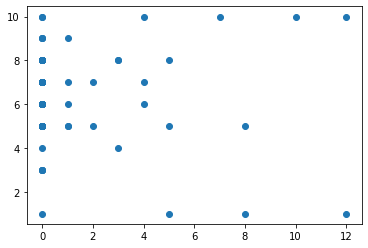

In [129]:
# Plot some points from our data - lets look at drinks and mood
x_drink = datam[:,5]
mood = datam[:,11]

plt.scatter(x_drink,mood)
plt.show

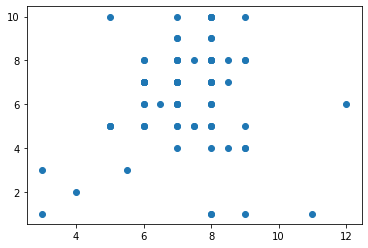

In [131]:
# What about sleep and energy? 
x_sleep = datam[:,3]
energy = datam[:,12]

plt.scatter(x_sleep,energy)

### Step 3)
#### How can we use these results? 

We can create a custom set of data - i.e. we can pick how many meals we eat, how healthy they are, etc & then 
look at the resulting mood and energy levels from those choices!

In [143]:
# Sample structure: x = datam[:,[3,4,5,6,7,8,9,10,13,15,16,17,18,19,20,21]]
# Order: [sleep, drink, drink_tot,healthy, meal_count, exercise, ex_min, sick, external, F, M, S, Su, Th, Tu, Wed]
x = np.array([6,1,8,0,2,0,0,1,0,0,0,0,0,1,0,0])
e = x@w_energy
m = x@w_mood

In [149]:
print('Our energy level will be: {0}'.format(round(e,2)))

Our energy level will be: 4.48


In [150]:
print('Our mood level will be: {0}'.format(round(m,2)))

Our mood level will be: 6.84


**Cool! With just two weeks of data it seems like we can pin down some decent results. Let's try a few more samples:**

In [ ]:
# Order: [sleep, drink, drink_tot,healthy, meal_count, exercise, ex_min, sick, external, F, M, S, Su, Th, Tu, Wed]
x = np.array([])
e = x@w_energy
m = x@w_mood
print('Our energy level will be: {0}'.format(round(e,2)))
print('Our mood level will be: {0}'.format(round(m,2)))

In [146]:
data.head()

,timestamp,ID,date,sleep_hrs,drink_d,drink_total,healthy_d,meal_count,exercise_d,ex_min,...,energy,external,day,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,1/24/2020 16:02,13,1/23/2020,5.5,0,0,0,2.0,1,30,...,3,1,Thursday,0,0,0,0,1,0,0
1,1/24/2020 16:16,12,1/24/2020,8.0,0,0,1,3.0,0,0,...,10,0,Friday,1,0,0,0,0,0,0
2,1/25/2020 14:32,13,1/24/2020,9.0,0,0,1,2.0,1,30,...,4,1,Friday,1,0,0,0,0,0,0
3,1/25/2020 21:15,9078708139,1/24/2020,8.5,0,0,0,2.0,0,0,...,7,0,Friday,1,0,0,0,0,0,0
4,1/26/2020 14:06,9078604403,1/24/2020,4.0,1,8,0,2.0,0,0,...,2,1,Friday,1,0,0,0,0,0,0
